# JAXspec fitting speedrun

In this example, the basic spectral fitting workflow is illustrated on a XMM-Newton observation of the
pulsating ULX candidate from Quintin+2020.

In [1]:
import numpyro
from jax.config import config

config.update("jax_enable_x64", True)
numpyro.set_platform("cpu")
numpyro.set_host_device_count(4)

The first step consists in building your model using the various components available in JAXspec.

In [2]:
from jaxspec.model.additive import Powerlaw
from jaxspec.model.multiplicative import Tbabs

model = Tbabs() * Powerlaw()

The second step consists in defining the data to be fitted.

In [3]:
from jaxspec.data.util import example_observations as obs_list
from jaxspec.fit import BayesianModel

forward = BayesianModel(model, list(obs_list.values()))

The third step consists in defining the priors for the model parameters.

In [4]:
import numpyro.distributions as dist

prior = {
    "powerlaw_1": {
        "alpha": dist.Uniform(0, 10), 
        "norm": dist.Exponential(1e4)
    }, 
    "tbabs_1": {"N_H": dist.Uniform(0, 1)}
}

The fourth step consists in defining the likelihood for the model parameters.

In [5]:
result = forward.fit(prior, num_chains=4, num_samples=1000)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Finally, you can print the results, in a LaTeX table for example. The `result.table()` will return a $\LaTeX$ compilable table.

In [6]:
print(result.table())

\begin{table}
    \centering
    \caption{Results of the fit}
    \label{tab:results}
    \begin{tabular}{cccc}
        \hline
		Model & $alpha$[Powerlaw (1)] & Norm [Powerlaw (1)] & $N_H$[Tbabs (1)] \\ 
		\hline
		Model & $1.844^{+0.018}_{-0.016}$ & $\left( 412.5^{+5.0}_{-7.9} \right) \times 10^{-6}$ & $\left( 154.8^{+5.2}_{-5.7} \right) \times 10^{-3}$ \\ 
		\hline
    \end{tabular}
\end{table}


You can also plot the parameter covariances using the `plot_corner` method.

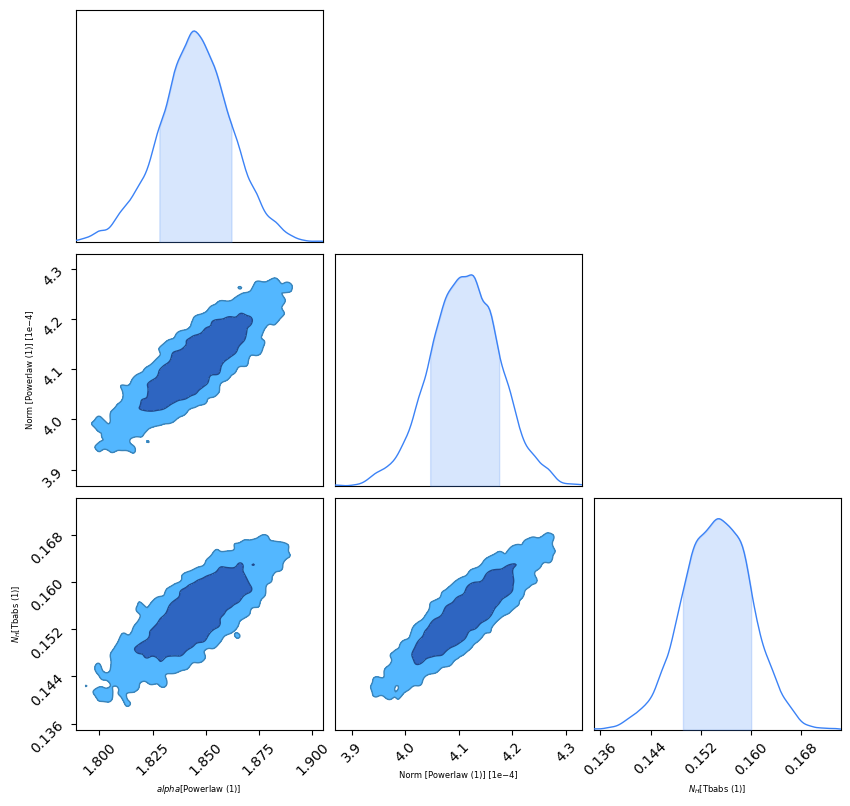

In [7]:
result.plot_corner()